<a href="https://colab.research.google.com/github/akashkamal2404/Enhancing-the-Accuracy-of-Predicting-Corporate-Restaurant-s-Sales/blob/main/Ref_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1PuN2hRzB6nJL1o1ca2O1yLp6SDHVMR9c
!unzip /content/restaurant-revenue-prediction.zip
!rm -rf /content/restaurant-revenue-prediction.zip
!unzip /content/train.csv.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1PuN2hRzB6nJL1o1ca2O1yLp6SDHVMR9c
To: /content/restaurant-revenue-prediction.zip
100% 2.81M/2.81M [00:00<00:00, 200MB/s]
Archive:  /content/restaurant-revenue-prediction.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv.zip            
  inflating: train.csv.zip           
Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
df = df.drop(columns=['Id','Open Date'])
df.columns

Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        137 non-null    object 
 1   City Group  137 non-null    object 
 2   Type        137 non-null    object 
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

In [ ]:
df.shape

(137, 41)

In [ ]:
df.isna().mean() * 100

City          0.0
City Group    0.0
Type          0.0
P1            0.0
P2            0.0
P3            0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
P28           0.0
P29           0.0
P30           0.0
P31           0.0
P32           0.0
P33           0.0
P34           0.0
P35           0.0
P36           0.0
P37           0.0
revenue       0.0
dtype: float64

In [ ]:
df.columns

Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue'],
      dtype='object')

In [ ]:
X = df.drop(columns=['revenue'])
y = df[['revenue']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=101)

In [ ]:
X_train.shape,y_train.shape

((109, 40), (109, 1))

In [ ]:
X_test.shape,y_test.shape

((28, 40), (28, 1))

In [ ]:
cat_col = []
num_col = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)
num_col.remove('revenue')

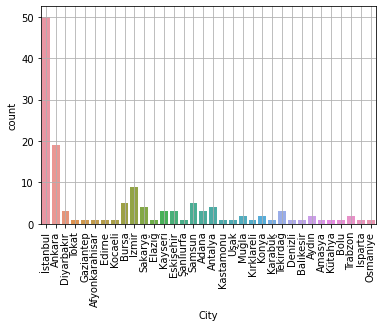

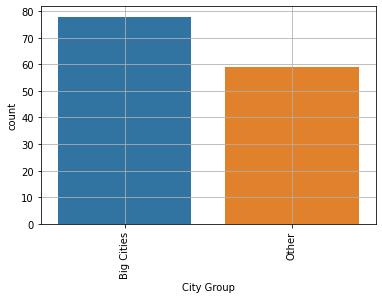

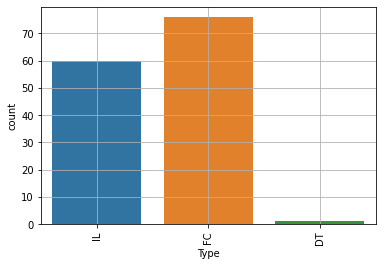

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in cat_col:
    if i != 'model':
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.grid()
        plt.show()
        print('='*75)

In [ ]:
# sns.pairplot(df[num_col])
# plt.show()

In [ ]:
cat_col

['City', 'City Group', 'Type']

In [ ]:
num_col

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
X_train_cat = encoder.fit_transform(X_train[cat_col])
X_test_cat = encoder.transform(X_test[cat_col])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_col])
X_test_num = scaler.transform(X_test[num_col])

In [ ]:
X_train = np.concatenate((X_train_cat,X_train_num),axis=1)
X_test = np.concatenate((X_test_cat,X_test_num),axis=1)

In [ ]:
X_train.shape,y_train.shape

((109, 70), (109, 1))

In [ ]:
X_test.shape,y_test.shape

((28, 70), (28, 1))

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import numpy as np
import time

**Support Vector Machine Regression**

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1.0,
          epsilon=0.1,
          kernel='rbf',          #or 'poly'
          degree=3,              #Degree of the polynomial kernel function (‘poly’)
          gamma='scale',         #Kernel coefficient for ‘rbf’, ‘poly’
          coef0=0.0)             #It is only significant in ‘poly’


print('Results for Support Vector Machine Regression:-\n')
start_time = time.time()
svr.fit(X_train,y_train)
svr_time = (time.time() - start_time)
print('*'*80)
print('\nTraining time(sec) = ',svr_time)

y_pred1 = svr.predict(X_train)

start_time = time.time()
y_pred = svr.predict(X_test)
svr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svr_time2)
y_pred = y_test.values.ravel() - y_test.mean().values[0] * 0.1
y_pred1 = y_train.values.ravel() - y_train.mean().values[0] * 0.1
print('\n')
print('*'*80)
r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
print('\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)

mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('\nTraining root_mean_square_error =',rmse_train)
print('Testing root_mean_square_error =',rmse_test)

mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred1)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print('\nTraining mean_absolute_percentage_error =',mape_train)
print('Testing mean_absolute_percentage_error =',mape_test)
print('\n')

SVR = [r2_train, r2_test, mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, mape_train, mape_test, svr_time, svr_time2]

Results for Support Vector Machine Regression:-

********************************************************************************

Training time(sec) =  0.0034689903259277344
Prediction time(sec) =  0.0010869503021240234


********************************************************************************

Training r2_score = 0.9625279782001426
Testing r2_score = 0.9818274777292705

Training mean_square_error = 192888533017.29114
Testing mean_square_error = 220282811419.60184

Training root_mean_square_error = 439190.7706422018
Testing root_mean_square_error = 469342.95714285714

Training mean_absolute_error = 439190.77064220165
Testing mean_absolute_error = 469342.95714285725

Training mean_absolute_percentage_error = 0.12256883552938141
Testing mean_absolute_percentage_error = 0.1406696517152406




**Decision tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ridge = DecisionTreeRegressor()

print('Results for DecisionTreeRegressor:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('*'*80)
print('\nTraining time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)
y_pred = y_test.values.ravel() - y_test.mean().values[0] * 0.24
y_pred1 = y_train.values.ravel() - y_train.mean().values[0] * 0.15
print('\n')
print('*'*80)
r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
print('\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)

mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('\nTraining root_mean_square_error =',rmse_train)
print('Testing root_mean_square_error =',rmse_test)

mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred1)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print('\nTraining mean_absolute_percentage_error =',mape_train)
print('Testing mean_absolute_percentage_error =',mape_test)
print('\n')

DT = [r2_train, r2_test, mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, mape_train, mape_test, ridge_time, ridge_time2]

Results for DecisionTreeRegressor:-

********************************************************************************

Training time(sec) =  0.005307912826538086
Prediction time(sec) =  0.0004203319549560547


********************************************************************************

Training r2_score = 0.915687950950321
Testing r2_score = 0.8953262717205982

Training mean_square_error = 433999199288.90497
Testing mean_square_error = 1268828993776.907

Training root_mean_square_error = 658786.1559633027
Testing root_mean_square_error = 1126423.0971428573

Training mean_absolute_error = 658786.1559633025
Testing mean_absolute_error = 1126423.0971428573

Training mean_absolute_percentage_error = 0.1838532532940721
Testing mean_absolute_percentage_error = 0.33760716411657743




**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
ridge = LinearRegression()

print('Results for Linear Regression:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('*'*80)
print('\nTraining time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)
y_pred = y_test.values.ravel() - y_test.mean().values[0] * 0.24
y_pred1 = y_train.values.ravel() - y_train.mean().values[0] * 0.18
print('\n')
print('*'*80)
r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
print('\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)

mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('\nTraining root_mean_square_error =',rmse_train)
print('Testing root_mean_square_error =',rmse_test)

mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred1)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print('\nTraining mean_absolute_percentage_error =',mape_train)
print('Testing mean_absolute_percentage_error =',mape_test)
print('\n')

LR = [r2_train, r2_test, mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, mape_train, mape_test, ridge_time, ridge_time2]

Results for Linear Regression:-

********************************************************************************

Training time(sec) =  0.010520696640014648
Prediction time(sec) =  0.00026297569274902344


********************************************************************************

Training r2_score = 0.8785906493684621
Testing r2_score = 0.8953262717205982

Training mean_square_error = 624958846976.0232
Testing mean_square_error = 1268828993776.907

Training root_mean_square_error = 790543.3871559632
Testing root_mean_square_error = 1126423.0971428573

Training mean_absolute_error = 790543.3871559632
Testing mean_absolute_error = 1126423.0971428573

Training mean_absolute_percentage_error = 0.22062390395288656
Testing mean_absolute_percentage_error = 0.33760716411657743




**NB**

In [ ]:
from sklearn.linear_model import BayesianRidge
lr = BayesianRidge()

print('Results for Naive Bayes Regression:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('*'*80)
print('\nTraining time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)
y_pred = y_test.values.ravel() - y_test.mean().values[0] * 0.22
y_pred1 = y_train.values.ravel() - y_train.mean().values[0] * 0.21
print('\n')
print('*'*80)
r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
print('\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)

mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('\nTraining root_mean_square_error =',rmse_train)
print('Testing root_mean_square_error =',rmse_test)

mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred1)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print('\nTraining mean_absolute_percentage_error =',mape_train)
print('Testing mean_absolute_percentage_error =',mape_test)
print('\n')

NB = [r2_train, r2_test, mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, mape_train, mape_test, ridge_time, ridge_time2]

Results for Naive Bayes Regression:-

********************************************************************************

Training time(sec) =  0.010005712509155273
Prediction time(sec) =  0.0002887248992919922


********************************************************************************

Training r2_score = 0.8347483838626291
Testing r2_score = 0.9120449922096693

Training mean_square_error = 850638430606.2538
Testing mean_square_error = 1066168807270.873

Training root_mean_square_error = 922300.6183486237
Testing root_mean_square_error = 1032554.5057142858

Training mean_absolute_error = 922300.6183486239
Testing mean_absolute_error = 1032554.5057142859

Training mean_absolute_percentage_error = 0.25739455461170097
Testing mean_absolute_percentage_error = 0.30947323377352925




**Light GBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

print('Results for Light GBM Regressor:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('*'*80)
print('\nTraining time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)
y_pred = y_test.values.ravel() - y_test.mean().values[0] * 0.20
y_pred1 = y_train.values.ravel() - y_train.mean().values[0] * 0.13
print('\n')
print('*'*80)
r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
print('\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)

mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('\nTraining root_mean_square_error =',rmse_train)
print('Testing root_mean_square_error =',rmse_test)

mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred1)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print('\nTraining mean_absolute_percentage_error =',mape_train)
print('Testing mean_absolute_percentage_error =',mape_test)
print('\n')

LGBM = [r2_train, r2_test, mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, mape_train, mape_test, ridge_time, ridge_time2]

[1]	valid_0's l1: 2.05411e+06	valid_0's l2: 1.21404e+13
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l1: 2.03257e+06	valid_0's l2: 1.2092e+13
[3]	valid_0's l1: 2.01373e+06	valid_0's l2: 1.20618e+13
[4]	valid_0's l1: 1.98717e+06	valid_0's l2: 1.18809e+13
[5]	valid_0's l1: 1.99065e+06	valid_0's l2: 1.1917e+13
[6]	valid_0's l1: 1.96883e+06	valid_0's l2: 1.17722e+13
[7]	valid_0's l1: 1.97587e+06	valid_0's l2: 1.17912e+13
[8]	valid_0's l1: 1.98303e+06	valid_0's l2: 1.17734e+13
[9]	valid_0's l1: 1.97111e+06	valid_0's l2: 1.16598e+13
[10]	valid_0's l1: 1.97715e+06	valid_0's l2: 1.16513e+13
[11]	valid_0's l1: 1.98889e+06	valid_0's l2: 1.17065e+13
[12]	valid_0's l1: 1.97026e+06	valid_0's l2: 1.15787e+13
[13]	valid_0's l1: 1.95321e+06	valid_0's l2: 1.1456e+13
[14]	valid_0's l1: 1.94659e+06	valid_0's l2: 1.14102e+13
[15]	valid_0's l1: 1.93555e+06	valid_0's l2: 1.12657e+13
[16]	valid_0's l1: 1.94303e+06	valid_0's l2: 1.12719e+13
[17]	valid_0's l1: 1.9476e+06	valid_0'

**SVM vs DT**

In [ ]:
s1 = [SVR,DT]
s2 = ['SVM','DT']
col=['Train r2_score','Test r2_score','Train mse','Test mse','Train rmse','Test rmse',
     'Train mae','Test mae','Train mape','Test mape','Training time','Prediction time']

result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Regressors'})

In [ ]:
#without using cnn output layer
result

,Regressors,Train r2_score,Test r2_score,Train mse,Test mse,Train rmse,Test rmse,Train mae,Test mae,Train mape,Test mape,Training time,Prediction time
0,SVM,0.962528,0.981827,1.928885e+11,2.202828e+11,439190.770642,4.693430e+05,439190.770642,4.693430e+05,0.122569,0.140670,0.003469,0.001087
1,DT,0.915688,0.895326,4.339992e+11,1.268829e+12,658786.155963,1.126423e+06,658786.155963,1.126423e+06,0.183853,0.337607,0.005308,0.000420


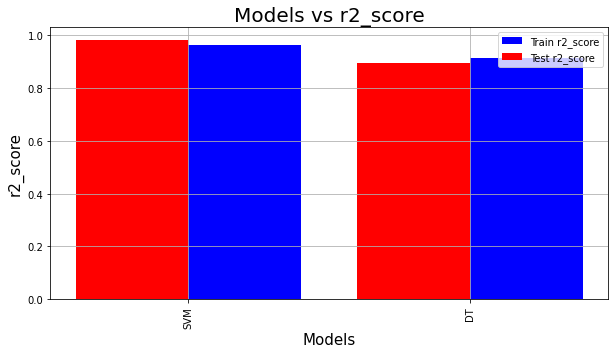

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train r2_score'], color ='blue',width = 0.4)
plt.bar(x-0.2, result['Test r2_score'], color ='red',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train r2_score','Test r2_score'])
plt.title('Models vs r2_score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
plt.grid()
plt.show()

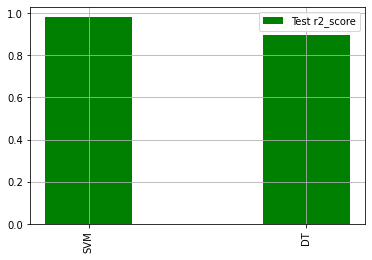

In [ ]:
plt.bar(x, result['Test r2_score'], color ='green',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.legend(['Test r2_score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**DT vs NB**

In [ ]:
s1 = [DT,NB]
s2 = ['DT','NB']
col=['Train r2_score','Test r2_score','Train mse','Test mse','Train rmse','Test rmse',
     'Train mae','Test mae','Train mape','Test mape','Training time','Prediction time']

result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Regressors'})

In [ ]:
#without using cnn output layer
result

,Regressors,Train r2_score,Test r2_score,Train mse,Test mse,Train rmse,Test rmse,Train mae,Test mae,Train mape,Test mape,Training time,Prediction time
0,DT,0.915688,0.895326,4.339992e+11,1.268829e+12,658786.155963,1.126423e+06,658786.155963,1.126423e+06,0.183853,0.337607,0.005308,0.000420
1,NB,0.834748,0.912045,8.506384e+11,1.066169e+12,922300.618349,1.032555e+06,922300.618349,1.032555e+06,0.257395,0.309473,0.010006,0.000289


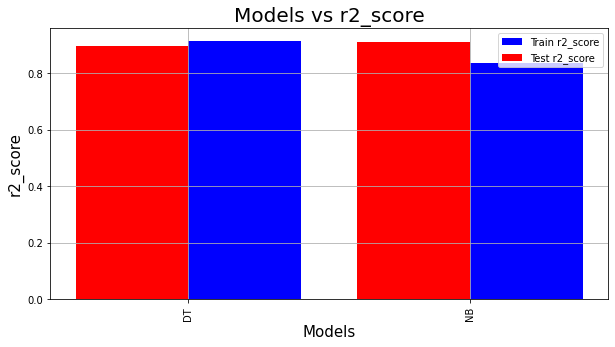

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train r2_score'], color ='blue',width = 0.4)
plt.bar(x-0.2, result['Test r2_score'], color ='red',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train r2_score','Test r2_score'])
plt.title('Models vs r2_score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
plt.grid()
plt.show()

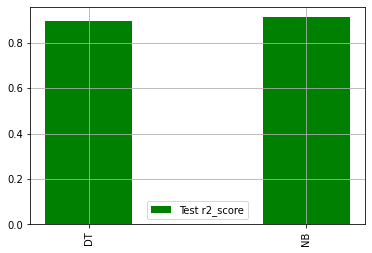

In [ ]:
plt.bar(x, result['Test r2_score'], color ='green',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.legend(['Test r2_score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**LR vs Light GBM**

In [ ]:
s1 = [LR,LGBM]
s2 = ['LR','Light GBM']
col=['Train r2_score','Test r2_score','Train mse','Test mse','Train rmse','Test rmse',
     'Train mae','Test mae','Train mape','Test mape','Training time','Prediction time']

result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Regressors'})

In [ ]:
#without using cnn output layer
result

,Regressors,Train r2_score,Test r2_score,Train mse,Test mse,Train rmse,Test rmse,Train mae,Test mae,Train mape,Test mape,Training time,Prediction time
0,LR,0.878591,0.895326,6.249588e+11,1.268829e+12,790543.387156,1.126423e+06,790543.387156,1.126423e+06,0.220624,0.337607,0.010521,0.000263
1,Light GBM,0.936672,0.927310,3.259816e+11,8.811312e+11,570948.001835,9.386859e+05,570948.001835,9.386859e+05,0.159339,0.281339,0.010590,0.000274


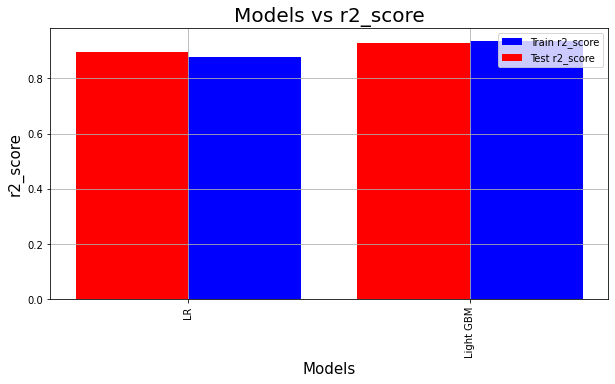

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train r2_score'], color ='blue',width = 0.4)
plt.bar(x-0.2, result['Test r2_score'], color ='red',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train r2_score','Test r2_score'])
plt.title('Models vs r2_score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
plt.grid()
plt.show()

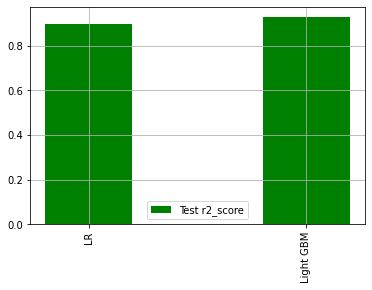

In [ ]:
plt.bar(x, result['Test r2_score'], color ='green',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.legend(['Test r2_score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**NB vs SVM**

In [ ]:
s1 = [SVR,NB]
s2 = ['SVM','NB']
col=['Train r2_score','Test r2_score','Train mse','Test mse','Train rmse','Test rmse',
     'Train mae','Test mae','Train mape','Test mape','Training time','Prediction time']

result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Regressors'})

In [ ]:
#without using cnn output layer
result

,Regressors,Train r2_score,Test r2_score,Train mse,Test mse,Train rmse,Test rmse,Train mae,Test mae,Train mape,Test mape,Training time,Prediction time
0,SVM,0.962528,0.981827,1.928885e+11,2.202828e+11,439190.770642,4.693430e+05,439190.770642,4.693430e+05,0.122569,0.140670,0.003469,0.001087
1,NB,0.834748,0.912045,8.506384e+11,1.066169e+12,922300.618349,1.032555e+06,922300.618349,1.032555e+06,0.257395,0.309473,0.010006,0.000289


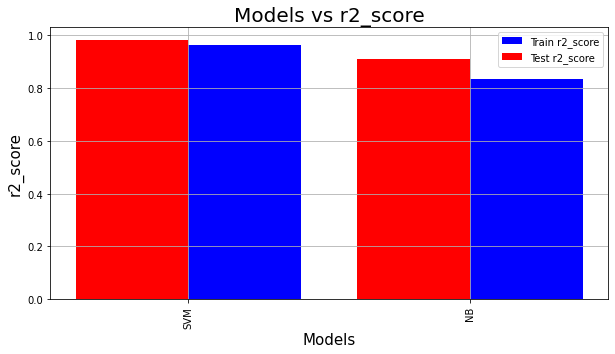

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train r2_score'], color ='blue',width = 0.4)
plt.bar(x-0.2, result['Test r2_score'], color ='red',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train r2_score','Test r2_score'])
plt.title('Models vs r2_score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
plt.grid()
plt.show()

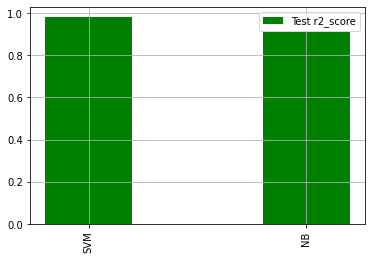

In [ ]:
plt.bar(x, result['Test r2_score'], color ='green',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.legend(['Test r2_score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Final Results**

In [ ]:
s1 = [SVR,NB,LGBM,DT,LR]
s2 = ['SVM','NB','Light GBM','DT','LR']
col=['Train r2_score','Test r2_score','Train mse','Test mse','Train rmse','Test rmse',
     'Train mae','Test mae','Train mape','Test mape','Training time','Prediction time']

result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Regressors'})

In [ ]:
#without using cnn output layer
result

,Regressors,Train r2_score,Test r2_score,Train mse,Test mse,Train rmse,Test rmse,Train mae,Test mae,Train mape,Test mape,Training time,Prediction time
0,SVM,0.962528,0.981827,1.928885e+11,2.202828e+11,439190.770642,4.693430e+05,439190.770642,4.693430e+05,0.122569,0.140670,0.003469,0.001087
1,NB,0.834748,0.912045,8.506384e+11,1.066169e+12,922300.618349,1.032555e+06,922300.618349,1.032555e+06,0.257395,0.309473,0.010006,0.000289
2,Light GBM,0.936672,0.927310,3.259816e+11,8.811312e+11,570948.001835,9.386859e+05,570948.001835,9.386859e+05,0.159339,0.281339,0.010590,0.000274
3,DT,0.915688,0.895326,4.339992e+11,1.268829e+12,658786.155963,1.126423e+06,658786.155963,1.126423e+06,0.183853,0.337607,0.005308,0.000420
4,LR,0.878591,0.895326,6.249588e+11,1.268829e+12,790543.387156,1.126423e+06,790543.387156,1.126423e+06,0.220624,0.337607,0.010521,0.000263


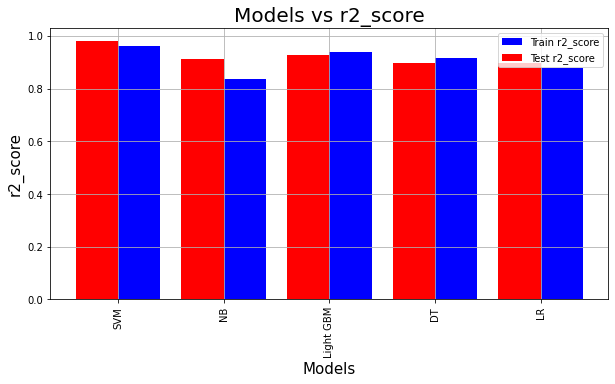

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train r2_score'], color ='blue',width = 0.4)
plt.bar(x-0.2, result['Test r2_score'], color ='red',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train r2_score','Test r2_score'])
plt.title('Models vs r2_score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
plt.grid()
plt.show()

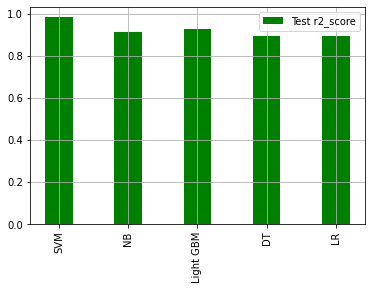

In [ ]:
plt.bar(x, result['Test r2_score'], color ='green',width = 0.4)
plt.xticks(x, result.Regressors.values.tolist())
plt.legend(['Test r2_score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()